In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [15]:
#import the xyz files and get the atoms in a list
CO2_Ru = pd.read_csv('CO2_Ru.csv', sep=',', header=None)
print(CO2_Ru.values)

[[0.005979288 0.99249146 0.821664669 'Ru']
 [0.33942587 0.99240554 0.82141084 'Ru']
 [0.672688078 0.9924962509999999 0.82170573 'Ru']
 [0.005669844 0.242584883 0.821056225 'Ru']
 [0.339454236 0.24254530800000002 0.8214742970000001 'Ru']
 [0.67263436 0.24246511699999998 0.8217243940000001 'Ru']
 [0.0060477330000000004 0.49245470799999996 0.8215601509999999 'Ru']
 [0.339341589 0.492474495 0.8216945309999999 'Ru']
 [0.672677162 0.492498449 0.821646005 'Ru']
 [0.00605524 0.742499495 0.8216945309999999 'Ru']
 [0.339354032 0.742450547 0.821672135 'Ru']
 [0.67272939 0.74245992 0.821668402 'Ru']
 [0.155695856 0.200304108 0.953644797 'C']
 [0.242287355 0.078011041 0.9530438179999999 'O']
 [0.069166332 0.322507818 0.954249508 'O']]


In [16]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [17]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO2_Ru_angs=np.matmul(CO2_Ru.iloc[:, 0:3],lattice_vectors)
CO2_Ru_angs = np.array(CO2_Ru_angs)
print(CO2_Ru_angs)

[[ 5.55181317  9.52990279 22.0121    ]
 [ 8.32413716  9.52907779 22.00530001]
 [11.09590717  9.5299488  22.01320001]
 [ 1.39197     2.3293     21.99580001]
 [ 4.16736     2.32892    22.007     ]
 [ 6.9375      2.32815    22.01370001]
 [ 2.78032     4.72855    22.0093    ]
 [ 5.55196     4.72874    22.01289999]
 [ 8.32397     4.72897    22.0116    ]
 [ 4.16656     7.12948    22.01289999]
 [ 6.93786     7.12901    22.01230001]
 [ 9.71012     7.1291     22.01220001]
 [ 2.40513001  1.92332    25.54780001]
 [ 2.44723     0.749062   25.5317    ]
 [ 2.36305     3.09672    25.564     ]]


In [18]:
# Slice off unnecessary z-space below.  Convert to atomic units of length.
CO2_Ru_angs[:, 2] = CO2_Ru_angs[:, 2] - 20
CO2_Ru_au = CO2_Ru_angs/0.52917721067121
print(CO2_Ru_au)

[[10.49140638 18.00890628  3.80231794]
 [15.73033946 18.00734725  3.78946783]
 [20.96822566 18.00899321  3.80439666]
 [ 2.63044207  4.40173906  3.77151541]
 [ 7.87516906  4.40102096  3.79268034]
 [13.109975    4.39956588  3.80534152]
 [ 5.25404334  8.93566448  3.79702671]
 [10.49168386  8.93602352  3.80382971]
 [15.73002358  8.93645816  3.80137307]
 [ 7.87365729 13.47276461  3.80382971]
 [13.1106553  13.47187644  3.80269591]
 [18.34946745 13.47204652  3.80250692]
 [ 4.54503701  3.63454806 10.48382261]
 [ 4.62459447  1.41552203 10.453398  ]
 [ 4.46551732  5.85195269 10.51443616]]


In [19]:
#Ready to start iterating?
a1 = 24
a2 = 24
a3 = 24


In [20]:
CO2_Ru = np.array(CO2_Ru)
split = np.linspace(0,a1,16)
#print(split_x)

V_ext_x = []

for i in split:
    #V_ext = 0
    mini_sum = 0
    for j in range(len(CO2_Ru_angs)):

        distance_x = np.sqrt(np.power(CO2_Ru_au[j,0] - i,2))


        pseudopotential_x = np.exp(-np.power(distance_x/(1),2))

        #print(pseudopotential)
        element = CO2_Ru[j,3]
        if element == 'Ru':
            charge = 10#44
        elif element == 'C':
            charge = 6
        elif element == 'O':
            charge = 8
        else:
            charge = 0.0
            
        mini_sum = mini_sum-28*charge*pseudopotential_x #28 is all the valence electrons of the system
        
    V_ext_x.append(mini_sum) 


print(min(V_ext_x))
print(np.sum(V_ext_x)/16)
V_ext_oper = np.diag(V_ext_x)
#V_ext_oper[0,0] = -V_ext
print(V_ext_x)
print(V_ext_oper)

-805.3404953355378
-276.6658681789154
[-0.27680747747231244, -96.94598382969153, -308.6574331998996, -805.3404953355378, -159.2685513985877, -552.5175040238388, -281.43623470345307, -353.5836040621065, -511.4095441384343, -201.57397803481211, -521.9335171768768, -176.6445139992814, -148.1129775191456, -272.877621838253, -36.04659603406548, -0.028528091189987947]
[[-2.76807477e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.69459838e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.08657433e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00

In [21]:
#E_kin_oper = -(1/np.power((a1/2),2))*np.array([[-6, 4, 4, 4],
#                       [4, -2, 0, 0],
#                       [4, 0, -2, 0],
#                       [4, 0, 0, -2]])
E_kin_oper = np.zeros((16,16))
for m in range(16):
    for n in range(16):
        if m==n:
            E_kin_oper[m,n] = -2
        if n == m - 1:
            E_kin_oper[m,n] = 1
        if n == m + 1:
            E_kin_oper[m,n] = 1
E_kin_oper[0,-1] = 1
E_kin_oper[-1,0] = 1
E_kin_oper = -(1/np.power((a1/2),2))*E_kin_oper
print(E_kin_oper)

[[ 0.01388889 -0.00694444 -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.00694444]
 [-0.00694444  0.01388889 -0.00694444 -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.00694444  0.01388889 -0.00694444 -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.00694444  0.01388889 -0.00694444 -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.00694444  0.01388889 -0.00694444
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.00694444  0.01388889
  -

In [22]:
V_e_e_oper = a1/16*np.eye(16)

In [23]:
V_nuc_scalar = 0
for k in range(len(CO2_Ru_au)):
    for l in range(len(CO2_Ru_au)):
        if k!=l:
            distance = np.sqrt(np.sum(np.power(CO2_Ru_au[k,:] - CO2_Ru_au[l,:],2)))
            element1 = CO2_Ru[k,3]
            if element1 == 'Ru':
                charge1 = 44
            elif element1 == 'C':
                charge1 = 6
            elif element1 == 'O':
                charge1 = 8
            else:
                charge1 = 0.0
            element2 = CO2_Ru[l,3]
            if element2 == 'Ru':
                charge2 = 44
            elif element2 == 'C':
                charge2 = 6
            elif element2 == 'O':
                charge2 = 8
            else:
                charge2 = 0.0
            pseudopotential = charge1*charge2*np.exp(-np.power(distance/(1),2))
            V_nuc_scalar += charge*pseudopotential/2 #Divided by two because otherwise every pair interaction is counted twice
print(V_nuc_scalar)
V_nuc_oper = V_nuc_scalar*np.eye(16)
print(V_nuc_oper)

5.562562074832925
[[5.56256207 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         5.56256207 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         5.56256207 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         5.56256207 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         5.56256207 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         5.56256207
  0.         0.         0.         0.         0.         0.
  0.         0.    

[[ 6.79964349e+00 -6.94444444e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.94444444e-03]
 [-6.94444444e-03 -8.98695329e+01 -6.94444444e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.94444444e-03 -3.01580982e+02 -6.94444444e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.94444444e-03 -7.98264044e+02
  -6.94444444e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00

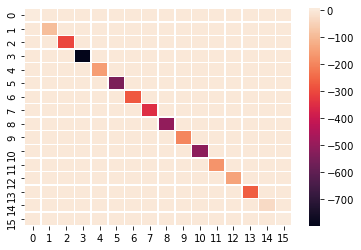

In [24]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper + V_nuc_oper
fig = sns.heatmap(H_oper, linewidth=0.5)
plt.savefig('CO2_Ru_Hamiltonian.png',dpi=300)
print(H_oper)

eigenvalues:  [-798.26404454    6.7994499     7.0481183   -28.97014621  -89.86953314
 -301.58098237 -545.44105336 -265.80117146 -141.03652448 -152.19210024
 -169.56806459 -514.8570665  -274.35978289 -346.50715346 -194.49752676
 -504.33309364]
minimum eigenvalue: 
-798.2640445435527
minimum eigenvector: 
[ 8.15345676e-16  1.37063330e-10  1.39816414e-05  1.00000000e+00
  1.07487169e-05  2.95241670e-10  3.91305545e-15  6.01142038e-20
  1.34345218e-24 -1.69149209e-26  4.24967363e-29  2.22054270e-26
 -9.71583482e-23  6.51354554e-19 -1.61101636e-16  3.40837694e-16]


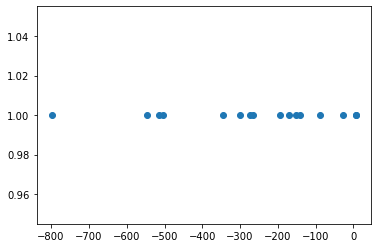

In [25]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)
plt.scatter(w,np.ones(len(w)))
print("minimum eigenvalue: ")
print(np.min(w))
print("minimum eigenvector: ")
print(v[:,np.argmin(w)])

In [28]:
pd.DataFrame(H_oper).to_csv('Ham_CO2_Ru.csv',index=False)
print(H_oper.size)

256
